In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('bmi_and_life.csv')
df.shape

(163, 3)

In [5]:
df.head()

,Country,Life expectancy,BMI
0,Afghanistan,52.8,20.62058
1,Albania,76.8,26.44657
2,Algeria,75.5,24.59620
3,Andorra,84.6,27.63048
4,Angola,56.7,22.25083


In [6]:
df.describe()

,Life expectancy,BMI
count,163.000000,163.000000
mean,69.666933,24.792378
std,8.981933,2.427900
min,44.500000,19.866920
25%,63.450000,22.527940
50%,71.800000,25.320540
75%,76.500000,26.603960
max,84.600000,30.995630


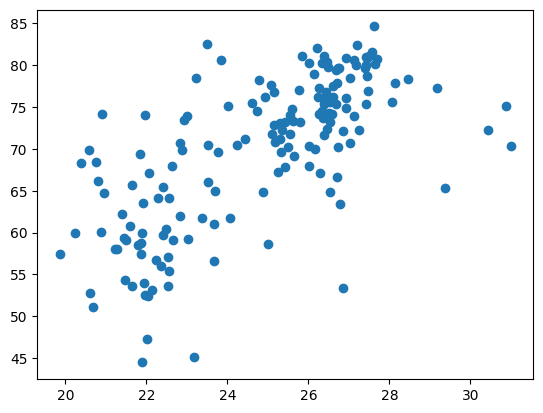

In [7]:
plt.scatter(df['BMI'], df['Life expectancy'])

In [8]:
df.isnull().sum()

Country            0
Life expectancy    0
BMI                0
dtype: int64

In [9]:
df = df.drop('Country', axis=1)
df.shape

(163, 2)

## Modeling

In [10]:
y = df[['Life expectancy']]
X = df[['BMI']]

In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression(fit_intercept=True)
lr.fit(X_train, y_train)

LinearRegression()

In [15]:
y_pred = lr.predict(X_test)

In [13]:
lr.intercept_

array([6.06832791])

In [14]:
lr.coef_

array([[2.56140028]])

## Validation

In [19]:
from sklearn.metrics import mean_squared_error

score = lr.score(X_test, y_test)
mse = mean_squared_error(y_test, y_pred)

In [ ]:
print("Accuracy is: ", round(score*100,2), " %")
print("MSE is: ", round(mse,2))

Accuracy is:  35.4  %
MSE is:  56.33


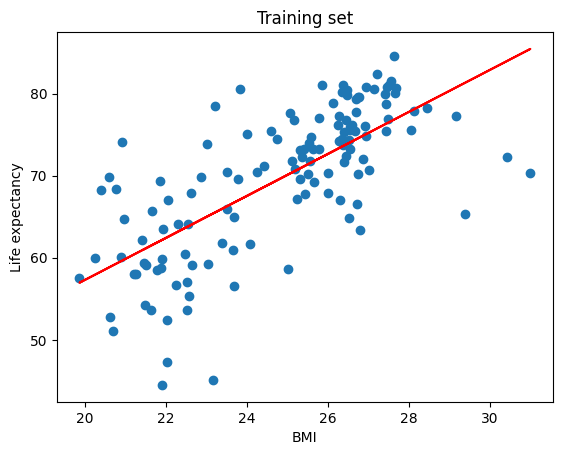

In [20]:
plt.scatter(X_train, y_train)
plt.plot(X_train, lr.predict(X_train), color='red')
plt.title("Training set")
plt.xlabel("BMI")
plt.ylabel("Life expectancy")
plt.show()

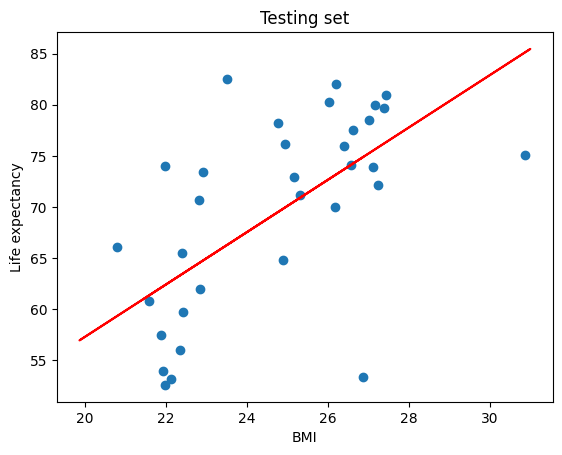

In [21]:
plt.scatter(X_test, y_test)
plt.plot(X_train, lr.predict(X_train), color='red')
plt.title("Testing set")
plt.xlabel("BMI")
plt.ylabel("Life expectancy")
plt.show()

## Polynomial Regression

In [22]:
from sklearn.preprocessing import PolynomialFeatures

In [23]:
y = df[['Life expectancy']]
X = df[['BMI']]

poly = PolynomialFeatures(degree=3)
X_poly = poly.fit_transform(X)

In [24]:
X.head(1)

,BMI
0,20.62058


In [27]:
X_poly[0]

array([1.00000000e+00, 2.06205800e+01, 4.25208320e+02, 8.76804217e+03])

In [28]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=42)

In [29]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression(fit_intercept=True)
lr.fit(X_train, y_train)

LinearRegression()

In [30]:
lr.intercept_

array([1560.95426712])

In [31]:
lr.coef_

array([[ 0.00000000e+00, -1.89399482e+02,  7.84223008e+00,
        -1.06044861e-01]])

In [32]:
y_pred = lr.predict(X_test)

In [33]:
from sklearn.metrics import mean_squared_error

score = lr.score(X_test, y_test)
mse = mean_squared_error(y_test, y_pred)

In [34]:
print("Accuracy is: ", round(score*100,2), " %")
print("MSE is: ", round(mse,2))

Accuracy is:  35.86  %
MSE is:  55.94


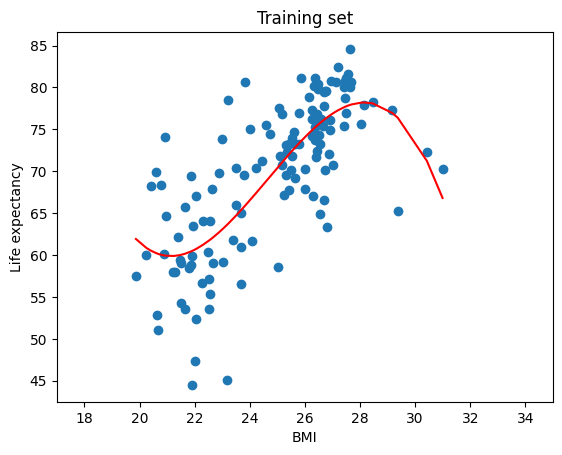

In [35]:
sort_idx = np.argsort(X_train[:, 1])
X_train_sorted = X_train[sort_idx, 1]
predictions_sorted = lr.predict(X_train[sort_idx])

plt.scatter(X_train[:, 1], y_train)
plt.plot(X_train_sorted, predictions_sorted, color='red')
plt.title("Training set")
plt.xlabel("BMI")
plt.ylabel("Life expectancy")
plt.xlim([17, 35])
plt.show()

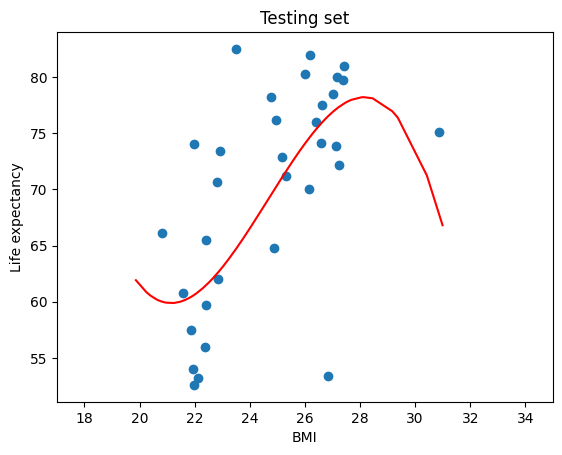

In [36]:
sort_idx = np.argsort(X_train[:, 1])
X_train_sorted = X_train[sort_idx, 1]
predictions_sorted = lr.predict(X_train[sort_idx])

plt.scatter(X_test[:,1], y_test)
plt.plot(X_train_sorted, predictions_sorted, color='red')
plt.title("Testing set")
plt.xlabel("BMI")
plt.ylabel("Life expectancy")
plt.xlim([17, 35])
plt.show()